<a href="https://colab.research.google.com/github/MarkellFultz/colab/blob/main/%E7%AA%AE%E8%88%89%E6%9C%80%E5%B0%8F%E5%B9%B3%E6%96%B9%E6%B3%95%E6%89%BE%E5%87%BAcost%E6%9C%80%E4%BD%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url='https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv'
data=pd.read_csv(url)

x=data['YearsExperience']
y=data['Salary']

In [ ]:
!pip install wget
import wget
wget.download('https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf')

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b9b7ca3becec5461bc1a354fb2817b5f3291854c045674bf0cfffae7224b2ec8
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


'ChineseFont.ttf'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34218 (\N{CJK UNIFIED IDEOGRAPH-85AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from font(s) DejaVu Sans.
  fig.canvas

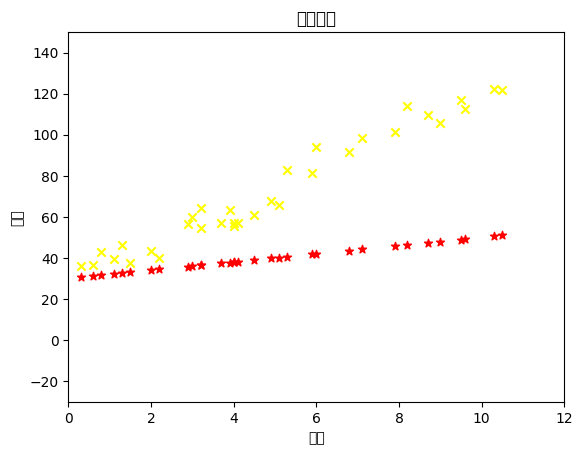

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager
def plot_pred(b1,b2):
  #線性建立
  plt.scatter(x,y,marker="x",color='yellow',label='母體')
  #設一個預測的 y=b1*x+b2
  y_prediction=x*b1+b2
  plt.scatter(x,y_prediction,marker='*',color='red',label='預測')
  plt.title('薪資預測')


  #設定字體
  fontManager.addfont("ChineseFont.ttf")
  mlp.rc('font',family='ChineseFont')
  #x,y設定
  plt.xlabel('年資')
  plt.ylabel('薪水')
  plt.xlim([0,12])
  plt.ylim([-30,150])
  #線名稱
  plt.legend
  plt.show()


plot_pred(2,30)

In [ ]:
def cost(x,y,b1,b2):
  pre_value=x*b1+b2
  cost=(y-pre_value)**2
  cost=cost.sum()/len(x)

  return cost


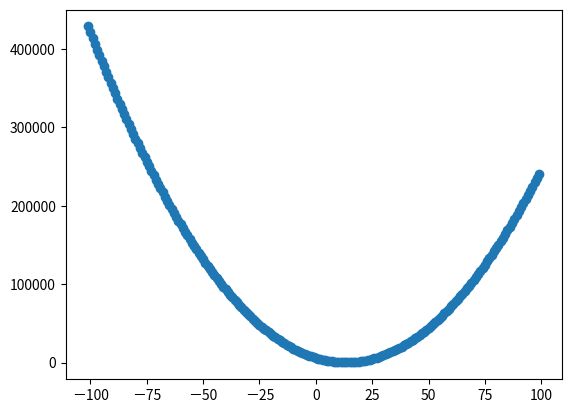

In [ ]:
#列出 b2=0 b1=-101~100的資料方差
costs=[]

for i in range(-101,100):
  costx=cost(x,y,i,0)
  costs.append(costx)

plt.scatter(range(-101,100),costs)
plt.show()

In [ ]:
import numpy as np
b1s=np.arange(-100,101)
b2s=np.arange(-100,101)
costs=np.zeros((201,201)) # 一個b1對應(101-(-100)個b2)201*201矩陣

costsaxis0=0 #矩陣X
for i in b1s:
  costsaxis1=0 #矩陣Y
  for j in b2s:
    costs[costsaxis0][costsaxis1]=cost(x,y,i,j)
    costsaxis1+=1

  costsaxis0+=1
costs


array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]])

cost最小32.6948484848485
當b1=[9]b2=[29]時cost最小


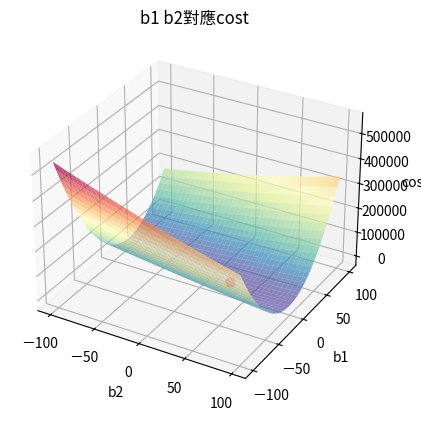

<Figure size 800x800 with 0 Axes>

In [ ]:
ax=plt.axes(projection='3d')
#設定顏色
#ax.xaxis.set_pane_color((0,0,0))
#ax.yaxis.set_pane_color((0,0,0))
#ax.zaxis.set_pane_color((0,0,0))

#設定圖角度
#ax.view_init(-120,40)

#將XYZ三個引入，但須先將兩個一維陣列轉換
b2_grid,b1_grid=np.meshgrid(b2s,b1s)
ax.plot_surface(b2_grid,b1_grid,costs,cmap='Spectral_r',alpha=0.7)
plt.figure(figsize=(8,8))


ax.set_title("b1 b2對應cost")
ax.set_xlabel('b2')
ax.set_ylabel('b1')
ax.set_zlabel('cost')


#找出cost最小
zmin=np.min(costs)
print(f'cost最小{zmin}')
#找到的點是在該陣列中位置因此x_index,y_index並非真正求的數字
x_index,y_index=np.where(costs==zmin)
print(f'當b1={b1s[x_index]}b2={b2s[y_index]}時cost最小')


#在圖表顯示
ax.scatter(b2s[y_index],b1s[x_index],costs[x_index,y_index],color='red',s=40)


plt.show()